# Test of MPDAF for reducing MUSE data cubes

I am going to follow along with the instructions in the [Getting Started](https://mpdaf.readthedocs.io/en/latest/start.html) page of the docs.  First import the library (I installed it with `pip install mpdaf`):

In [1]:
from mpdaf.obj import Cube

Now specify where the FITS file is

In [2]:
from pathlib import Path

In [4]:
datapath = Path("/Users/will/Work/Muse-Hii-Data/SMC-NGC-346/")
fitsfilepath = datapath / "ADP.2017-10-16T11_04_19.247.fits"

## Load the data cube

It turns out that you can't send a path object directly to `Cube`, so we have to convert it to a string first:

In [7]:
cube = Cube(str(fitsfilepath))

In [9]:
cube.info()

[INFO] 3801 x 326 x 346 Cube (/Users/will/Work/Muse-Hii-Data/SMC-NGC-346/ADP.2017-10-16T11_04_19.247.fits)
[INFO] .data(3801 x 326 x 346) (1e-20 erg / (Angstrom cm2 s)), .var(3801 x 326 x 346)
[INFO] center:(-72:10:31.853,00:59:02.986) size:(65.200",69.200") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4599.94 max:9349.94 step:1.25 Angstrom


## Inspect an image

Sum all the wavelengths to make a white-light image

In [10]:
ima = cube.sum(axis=0)
type(ima)

mpdaf.obj.image.Image

Now, we will plot the image.  First, load the graphics libraries:

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

I make a few changes from the tutorial.  I make the figure a bit bigger than default, change the brightness scale to logarithmic, and use an inverse grayscale color map. Also, I use the `use_wcs` option so that the axes are plotted in celestial coordinates.

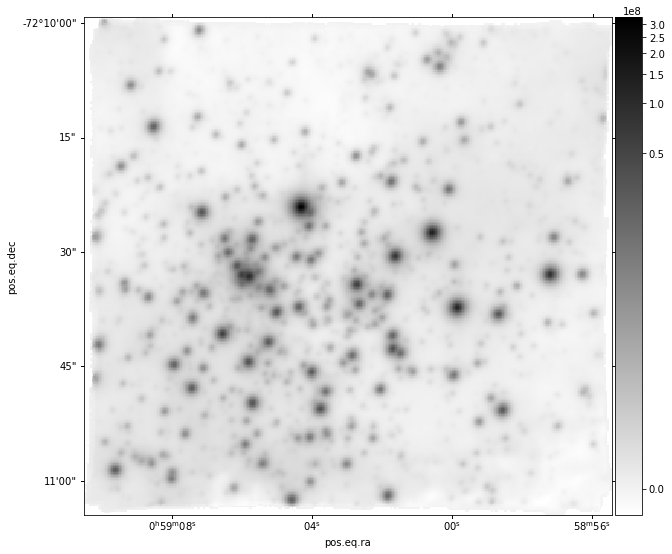

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ima.plot(use_wcs=True, cmap="gray_r", scale="log", colorbar="v");

So, the white light image is dominated by the stars, but there is a bit of diffuse emission visible too.

## Look at spectrum

Sum all the spatial pixels to get a global spectrum:

In [20]:
sp = cube.sum(axis=(1, 2))
type(sp)

mpdaf.obj.spectrum.Spectrum

Plot the full range of the spectrum on a log scale:

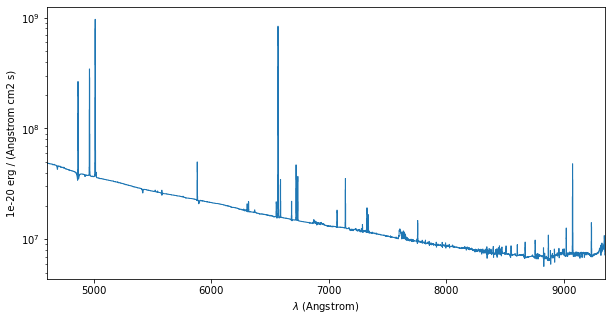

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sp.plot(ax=ax)
ax.set(
    yscale = "log",
);

Zoom in on the region around Hα λ6563 and zoom the vertical axis to emphasize weaker lines:

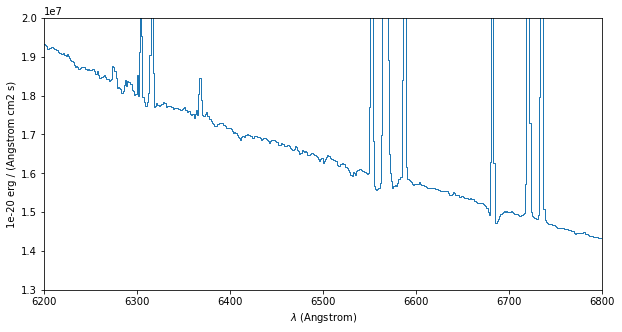

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
sp.plot(ax=ax)
ax.set(
    xlim=[6200, 6800],
    yscale = "linear",
    ylim=[1.3e7, 2e7],
);

We see [O I] λλ6300,6363 and [S III] λ6312. Then the [N II] + Hα cluster with what looks like underlying stellar absorption on the Hα.  Then He I λ6678 with clear stellar absorption, then the [S II] λλ6716,31 doublet.